In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#train['Average_Ambient_Pollution'] = (train.Min_Ambient_Pollution + train.Max_Ambient_Pollution) / 2 
#test['Average_Ambient_Pollution'] = (test.Min_Ambient_Pollution + test.Max_Ambient_Pollution) / 2 

train['Location_Type'] = train['Location_Type'].astype(str)
test['Location_Type'] = test['Location_Type'].astype(str)
'''
test = test.drop(['Max_Breeze_Speed', 'Min_Breeze_Speed', 'Max_Atmospheric_Pressure',
           'Min_Atmospheric_Pressure', 'Min_Ambient_Pollution',
           'Max_Ambient_Pollution', 'Max_Moisture_In_Park',
           'Min_Moisture_In_Park'], axis=1)
train = train.drop(['Max_Breeze_Speed', 'Min_Breeze_Speed', 'Max_Atmospheric_Pressure',
            'Min_Atmospheric_Pressure', 'Min_Ambient_Pollution',
            'Max_Ambient_Pollution', 'Max_Moisture_In_Park',
            'Min_Moisture_In_Park'], axis=1)
'''
all_data = pd.concat((train.loc[:, 'Park_ID':'Location_Type'],
                      test.loc[:, 'Park_ID':'Location_Type']))
train.dtypes

ID                                int64
Park_ID                           int64
Date                             object
Direction_Of_Wind               float64
Average_Breeze_Speed            float64
Max_Breeze_Speed                float64
Min_Breeze_Speed                float64
Var1                            float64
Average_Atmospheric_Pressure    float64
Max_Atmospheric_Pressure        float64
Min_Atmospheric_Pressure        float64
Min_Ambient_Pollution           float64
Max_Ambient_Pollution           float64
Average_Moisture_In_Park        float64
Max_Moisture_In_Park            float64
Min_Moisture_In_Park            float64
Location_Type                    object
Footfall                          int64
dtype: object

In [53]:
all_data['Day'] = all_data.Date.str.split('-').str[0].astype(int)
all_data['Month'] = all_data.Date.str.split('-').str[1].astype(int)
all_data = all_data.drop('Date', axis = 1)

train['Day'] = train.Date.str.split('-').str[0].astype(int)
train['Month'] = train.Date.str.split('-').str[1].astype(int)
train = train.drop('Date', axis = 1)

test['Day'] = test.Date.str.split('-').str[0].astype(int)
test['Month'] = test.Date.str.split('-').str[1].astype(int)
test = test.drop('Date', axis = 1)

train['Average_Ambient_Pollution'] = (train.Min_Ambient_Pollution + train.Max_Ambient_Pollution) / 2 
test['Average_Ambient_Pollution'] = (test.Min_Ambient_Pollution + test.Max_Ambient_Pollution) / 2
all_data['Average_Ambient_Pollution'] = (all_data.Min_Ambient_Pollution + all_data.Max_Ambient_Pollution) / 2


all_data.dtypes

Park_ID                           int64
Direction_Of_Wind               float64
Average_Breeze_Speed            float64
Max_Breeze_Speed                float64
Min_Breeze_Speed                float64
Var1                            float64
Average_Atmospheric_Pressure    float64
Max_Atmospheric_Pressure        float64
Min_Atmospheric_Pressure        float64
Min_Ambient_Pollution           float64
Max_Ambient_Pollution           float64
Average_Moisture_In_Park        float64
Max_Moisture_In_Park            float64
Min_Moisture_In_Park            float64
Location_Type                    object
Day                               int64
Month                             int64
Average_Ambient_Pollution       float64
dtype: object

In [11]:
train.dtypes

ID                                int64
Park_ID                           int64
Direction_Of_Wind               float64
Average_Breeze_Speed            float64
Max_Breeze_Speed                float64
Min_Breeze_Speed                float64
Var1                            float64
Average_Atmospheric_Pressure    float64
Max_Atmospheric_Pressure        float64
Min_Atmospheric_Pressure        float64
Min_Ambient_Pollution           float64
Max_Ambient_Pollution           float64
Average_Moisture_In_Park        float64
Max_Moisture_In_Park            float64
Min_Moisture_In_Park            float64
Location_Type                    object
Footfall                          int64
Day                               int64
Month                             int64
Average_Ambient_Pollution       float64
dtype: object

In [54]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# For right skewed data
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.8]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

# For left skewed data
skewed_feats_left = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats_left = skewed_feats_left[skewed_feats_left < -0.8]
skewed_feats_left = skewed_feats_left.index

all_data[skewed_feats_left] = np.power(all_data[skewed_feats_left], 3)

In [55]:
all_data = all_data.fillna(all_data.median())
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
all_data = pd.get_dummies(all_data)
y = train.Footfall

In [19]:
def rmse_cv(model):
    rmse = -cross_val_score(model, X_train, y,
                   scoring="mean_squared_error", cv=5)
    return rmse

In [20]:
for c in train.columns:
    print c,':',skew(train[c].dropna())

ID : 0.0137381300174
Park_ID : -0.0230211623087
Direction_Of_Wind : -0.3388085786
Average_Breeze_Speed : 1.29359512201
Max_Breeze_Speed : 1.10897260967
Min_Breeze_Speed : 1.55376410602
Var1 : 4.33791017285
Average_Atmospheric_Pressure : -0.28550255553
Max_Atmospheric_Pressure : -0.209862019156
Min_Atmospheric_Pressure : -0.344110614821
Min_Ambient_Pollution : -0.29505495956
Max_Ambient_Pollution : -1.8838785083
Average_Moisture_In_Park : -0.801725261022
Max_Moisture_In_Park : -2.07353862117
Min_Moisture_In_Park : -0.34311366811
Location_Type : -0.165165356354
Footfall : -0.195627064184
Average_Ambient_Pollution : -0.491254898775
Day : 0.00673207126918
Month : -0.0552472945254


In [10]:
for c in test.columns:
    print c,':',skew(test[c].dropna())

ID : -4.96536043578e-13
Park_ID : -0.0699450692215
Direction_Of_Wind : -0.340069467298
Average_Breeze_Speed : 1.30555368743
Var1 : 4.49257311168
Average_Atmospheric_Pressure : -0.266585199591
Average_Moisture_In_Park : -0.684522190251
Location_Type : -0.137264275665
Average_Ambient_Pollution : -0.57130415354
Day : 0.00676002320958
Month : -0.00879766091707


In [ ]:
train.Average_Breeze_Speed.plot(kind='hist')

In [ ]:
test.Average_Breeze_Speed.plot(kind='hist')

In [23]:
i = 3
while i <= 15:
    rmse = rmse_cv(GradientBoostingRegressor(min_samples_split=800, min_samples_leaf=50,max_depth=i, max_features='sqrt',subsample=0.8, random_state=10))
    print "i:", i, ",", rmse.mean(),',',rmse
    i+=1

i: 3 , 1282.41198291 , [ 1117.20213743  1212.53340793  1458.74279175  1543.82183257  1079.75974488]
i: 4 , 646.482139398 , [ 609.06783962  599.74131921  587.14688376  661.54693084  774.90772356]
i: 5 , 477.561304037 , [ 463.72725082  451.05081832  462.80138046  503.89394816  506.33312243]
i: 6 , 399.559333999 , [ 392.76856483  338.278246    391.81244936  489.06132621  385.8760836 ]
i: 7 , 316.465579403 , [ 314.67008326  254.82004564  308.54904984  344.40297729  359.88574098]
i: 8 , 251.785936148 , [ 295.62312483  233.44481621  218.99041842  264.66140044  246.20992084]
i: 9 , 272.999126399 , [ 272.88411357  253.9685773   287.57526901  264.57450534  285.99316677]
i: 10 , 242.102802197 , [ 239.30334754  220.87127002  230.44986204  248.31117149  271.5783599 ]
i: 11 , 240.216558673 , [ 238.12418849  227.71839615  222.74495896  256.39788789  256.09736187]
i: 12 , 231.065256032 , [ 224.53095772  219.10987892  202.59229891  250.87153006  258.22161455]
i: 13 , 233.943531909 , [ 265.15750211  20

In [22]:
i = 30
while i <= 70:
    rmse = rmse_cv(GradientBoostingRegressor(min_samples_split=800, min_samples_leaf=i,max_depth=9, max_features='sqrt',subsample=0.8, random_state=10))
    print "i:", i, ",", rmse.mean(),',',rmse
    i+=10

i: 30 , 260.984555364 , [ 298.02671723  242.54622734  253.35936049  264.11331684  246.87715491]
i: 40 , 262.778375682 , [ 266.2869417   257.05533098  274.98075369  254.19845658  261.37039546]
i: 50 , 272.999126399 , [ 272.88411357  253.9685773   287.57526901  264.57450534  285.99316677]
i: 60 , 291.494861125 , [ 288.47810544  278.42831342  283.15909534  274.15153294  333.25725849]
i: 70 , 269.720934335 , [ 271.7966691   276.19261365  246.30382841  268.65007133  285.66148918]


In [25]:
print rmse_cv(GradientBoostingRegressor(min_samples_split=800, min_samples_leaf=30,max_depth=12, max_features='sqrt',subsample=0.8, random_state=10))

[ 257.17888743  243.24033967  197.12155439  281.22734766  249.85395977]


In [7]:
train.columns

Index([u'ID', u'Park_ID', u'Direction_Of_Wind', u'Average_Breeze_Speed',
       u'Max_Breeze_Speed', u'Min_Breeze_Speed', u'Var1',
       u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'Footfall', u'Day', u'Month', u'Average_Ambient_Pollution'],
      dtype='object')

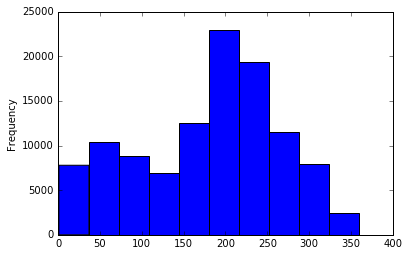

In [8]:
train.Direction_Of_Wind.plot(kind = 'hist')

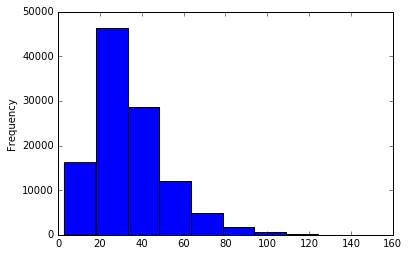

In [9]:
train.Average_Breeze_Speed.plot(kind = 'hist')

In [61]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

model = GradientBoostingRegressor(n_estimators=800, min_samples_leaf=50, max_depth=9, loss='huber', learning_rate=0.04, max_features='sqrt', subsample=0.8, random_state=10)
model.fit(X_train, y)


GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.04,
             loss='huber', max_depth=9, max_features='sqrt',
             max_leaf_nodes=None, min_samples_leaf=50, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=800,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False)

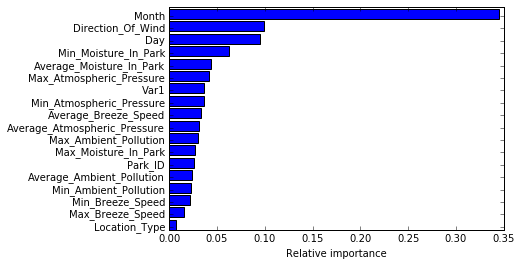

In [44]:
indices = np.argsort(model.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(X_train.columns.get_values())), model.feature_importances_[indices])
plt.yticks(np.arange(len(X_train.columns.get_values())) + 0.25, np.array(X_train.columns.get_values())[indices])
_ = plt.xlabel('Relative importance')

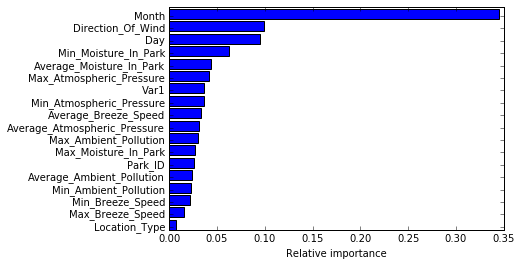

In [57]:
indices = np.argsort(model.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(X_train.columns.get_values())), model.feature_importances_[indices])
plt.yticks(np.arange(len(X_train.columns.get_values())) + 0.25, np.array(X_train.columns.get_values())[indices])
_ = plt.xlabel('Relative importance')

In [65]:
model.feature_importances_

array([ 0.03098887,  0.11183993,  0.05242676,  0.02555898,  0.02250479,
        0.04340892,  0.05510453,  0.06305784,  0.06125709,  0.03207781,
        0.03146433,  0.0505757 ,  0.03452539,  0.06459158,  0.00751627,
        0.12290066,  0.15664877,  0.03355178])